### Install cryptocompare

In [3]:
import cryptocompare as cc
import json
import requests
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

/opt/anaconda3/lib/python3.8/site-packages/tslearn/clustering/kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [5]:
from tqdm.autonotebook import tqdm

### Auth cryptocompare

In [6]:
CRYPTOCOMPARE_API_KEY = 'c19ae548abc855f895ee99bbdacb341095f2ab09e8a54a09eafd15e3ee215258'

In [7]:
ccObject = cc.cryptocompare._set_api_key_parameter(CRYPTOCOMPARE_API_KEY)

### Function which get name of pair, number of days before today's date. Function return dataset with crypto pair

In [8]:
def PairData(type1, type2, lastDate, days, exchangeName):

    test= cc.get_historical_price_day(type1, type2, limit=days, exchange=exchangeName, toTs=lastDay)
    
    df1 = pd.DataFrame.from_dict(test)
    
    df1['time'] = pd.to_datetime(df1['time'], unit='s')
    
    df1 = df1.set_index(pd.DatetimeIndex(data=df1['time'], name='Date'))
    
    df1 = df1.drop(labels=['time', 'conversionType', 'conversionSymbol', 'volumefrom',
                          'volumeto','open','high','low'], axis=1)
    
    
    column_names = ['close']
    
    df1 = df1.reindex(columns=column_names)
    
    df1 = df1.rename(columns={'close':'Close {name}'.format(name=type1)})
    
    df1 = df1.T
    
    
    
    return df1


In [9]:
lastDay = datetime.datetime.today()

In [10]:
df = PairData('BTC', 'USD', lastDay, 60, 'CCCAGG')
df.head()

Date,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,...,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04
Close BTC,40888.18,42852.18,44617.96,43827.75,46292.61,45601.03,45556.69,44425.52,47832.93,47102.03,...,42721.91,43201.79,42187.51,41056.79,41539.43,43829.34,48164.35,47669.02,48234.05,49317.84


In [11]:
df = pd.DataFrame(data=df)

In [12]:
df.index

Index(['Close BTC'], dtype='object')

### Creating  datasets with pair USD-CRYPTOCURRENCY

In [13]:
CryptoDict = ['BTC', 'ETH', 'ATOM', 'AVAX', 'XRP','ADA', 'SOL', 'DOT', 'FIL', 'LUNA', 
              'LINK', 'BNB', 'XTZ','LTC','FTT', 'TRX', 'DOGE', 'CELR', 'BCH', 'EOS',
              'FTM', 'OMG', 'ALGO', 'COTI', 'ETC', 'DYDX', 'OKB', 'CELO', 'MATIC',
             'SAND', '1INCH', 'ZIL', 'REP', 'ELF', 'MTL', 'LSK', 'DENT','CVC','AR',
             'ACH', 'XEM', 'WBTC', 'ICX', 'BAT', 'ZEN', 'ZRX', 'RSR', 'LTO', 'UTK',
             'XMR', 'IOST', 'MLN', 'VET', 'SRM', 'JST', 'HBAR', 'NEAR', 'AXS', 'SUSHI',
             'MKR', 'QTUM', 'EGLD', 'ZEC', 'DASH', 'REN', 'NEO', 'KAVA', 'FET', 'CHZ',
             'CRV', 'RVN', 'GRT', 'NULS', 'SHIB', 'MANA', 'AAVE', 'KSM', 'CAKE', 'MIOTA',
             'FLOW', 'ONT', 'RUNE', 'ENJ', 'WAVES', 'ROSE', 'SXP', 'SNX', 'COMP', 'YFI',
             'ONE', 'IOTX', 'UNI', 'HT', 'BTT', 'XLM', 'BSV', 'THETA', 'ICP', 'PUNDIX']
USD = 'USD'


In [14]:
#i = 0
#dfCrypto = pd.DataFrame()
#for i in range(len(CryptoDict)):
#    data1 = PairData(CryptoDict[i],'USD',lastDay, 30, 'CCCAGG')
#    dfCrypto = dfCrypto.append(data1, ignore_index=False)
#    i+=1

In [ ]:
# dfCrypto.head()

In [ ]:
# dfCrypto.to_csv('ClosePriceCurrency')

# Data preprocessing

In [22]:
crypto_scaled = scaler.fit_transform(crypto.iloc[:, 1:].T).T

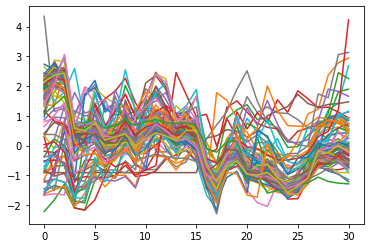

In [23]:
plt.plot(crypto_scaled.T);

# K-means с ценой закрытия

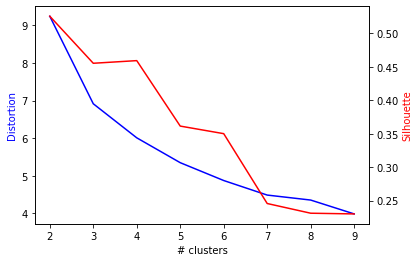

In [24]:
distortions = []
silhouette = []
K = range(2, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="euclidean", n_jobs=6, max_iter=10, n_init=5)
    kmeanModel.fit(crypto_scaled)
    distortions.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(crypto_scaled, kmeanModel.labels_, metric="euclidean"))

    
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(K, distortions, 'b-')
ax2.plot(K, silhouette, 'r-')

ax1.set_xlabel('# clusters')
ax1.set_ylabel('Distortion', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

In [25]:
n_clusters = 5
ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", n_jobs=6, max_iter=10)
ts_kmeans.fit(crypto_scaled)

TimeSeriesKMeans(max_iter=10, n_clusters=5, n_jobs=6)

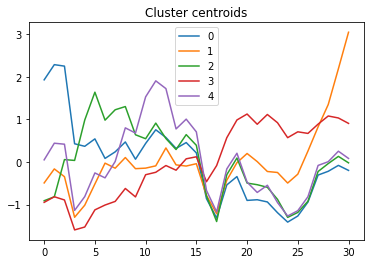

In [26]:
for cluster_number in range(n_clusters):
    plt.plot(ts_kmeans.cluster_centers_[cluster_number, :, 0].T, label=cluster_number)
plt.title("Cluster centroids")
plt.legend()
plt.show()

In [27]:
crypto.iloc[:,1:]

,2021-09-04,2021-09-05,2021-09-06,2021-09-07,2021-09-08,2021-09-09,2021-09-10,2021-09-11,2021-09-12,2021-09-13,...,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04
0,49935.2900,51784.160,52693.3200,46856.3100,46073.4500,46392.8500,44853.1000,45166.120,46049.7200,44958.5600,...,42721.9100,43201.7900,42187.5100,41056.7900,41539.4300,43829.3400,48164.3500,47669.0200,48234.050,48694.3000
1,3887.0100,3952.330,3928.4000,3433.4800,3499.6900,3424.2400,3209.4100,3266.430,3405.3200,3285.4000,...,2925.3400,3064.2100,2927.7300,2807.4400,2850.8700,3000.8300,3310.6300,3389.4800,3420.140,3370.0500
2,24.4200,25.760,25.1200,21.0100,20.6300,26.8300,29.3700,27.280,35.0500,35.7700,...,39.4900,39.8700,37.2300,33.6900,33.8500,36.2200,37.8800,38.6200,38.770,37.2500
3,47.2100,48.180,47.1000,37.8500,37.0300,40.7600,49.3400,57.090,59.1700,53.1900,...,68.4000,66.8800,66.4000,61.5400,65.4700,66.6200,67.7200,69.1700,68.730,66.4500
4,1.2560,1.307,1.3910,1.1270,1.0990,1.0870,1.0550,1.079,1.1190,1.0640,...,0.9415,0.9448,0.9229,0.8939,0.9279,0.9530,1.0430,1.0370,1.055,1.0420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.3699,0.398,0.4238,0.3353,0.3298,0.3326,0.3168,0.325,0.3329,0.3187,...,0.2773,0.2764,0.2651,0.2566,0.2697,0.2788,0.3005,0.3167,0.315,0.3039
95,187.1100,192.640,192.4900,156.3100,156.4700,155.8300,151.2000,154.020,155.0500,149.8900,...,134.6600,129.5200,127.4900,124.4400,126.7400,129.5200,139.7700,138.9100,145.380,144.7300
96,7.5140,8.197,9.2240,6.9910,6.8070,6.9820,6.4510,6.445,6.5860,6.1310,...,5.1020,5.1020,4.9220,4.6880,4.8270,5.0500,5.9860,6.0600,6.115,5.9650
97,78.1500,79.390,79.4600,61.1500,61.5500,60.7700,56.9200,58.040,59.5400,55.0700,...,45.8400,43.7900,42.5000,40.8900,44.3500,45.1300,51.6100,49.6100,50.300,48.8800


In [ ]:
ts_kmeans.predict(crypto)

In [ ]:
crypto.head()

In [29]:
crypto['cluster'] = ts_kmeans.predict(crypto_scaled)
pd.DataFrame(crypto.groupby('cluster')['Unnamed: 0'].value_counts())

/opt/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 99 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


Unnamed: 0
cluster Unnamed: 0             
0       Close 1INCH           1
        Close AAVE            1
        Close ACH             1
        Close ADA             1
        Close BAT             1
...                         ...
4       Close JST             1
        Close KSM             1
        Close SNX             1
        Close SUSHI           1
        Close TRX             1

[99 rows x 1 columns]

In [30]:
crypto = crypto.rename(columns={"Unnamed: 0": "Currency"})

In [54]:
def plot_cluster_tickers(current_cluster):
    fig, ax = plt.subplots(
        int(np.ceil(current_cluster.shape[0]/4)),
        4,
        figsize=(30, 3*int(np.ceil(current_cluster.shape[0]/4)))
    )
    fig.autofmt_xdate(rotation=45)
    ax = ax.reshape(-1)

    for index, (_, row) in enumerate(current_cluster.iterrows()):
        ax[index].plot(row.iloc[5:-1])
        ax[index].set_title(f"{row.Currency}\n{row.Currency}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

                          Cluster number: 0


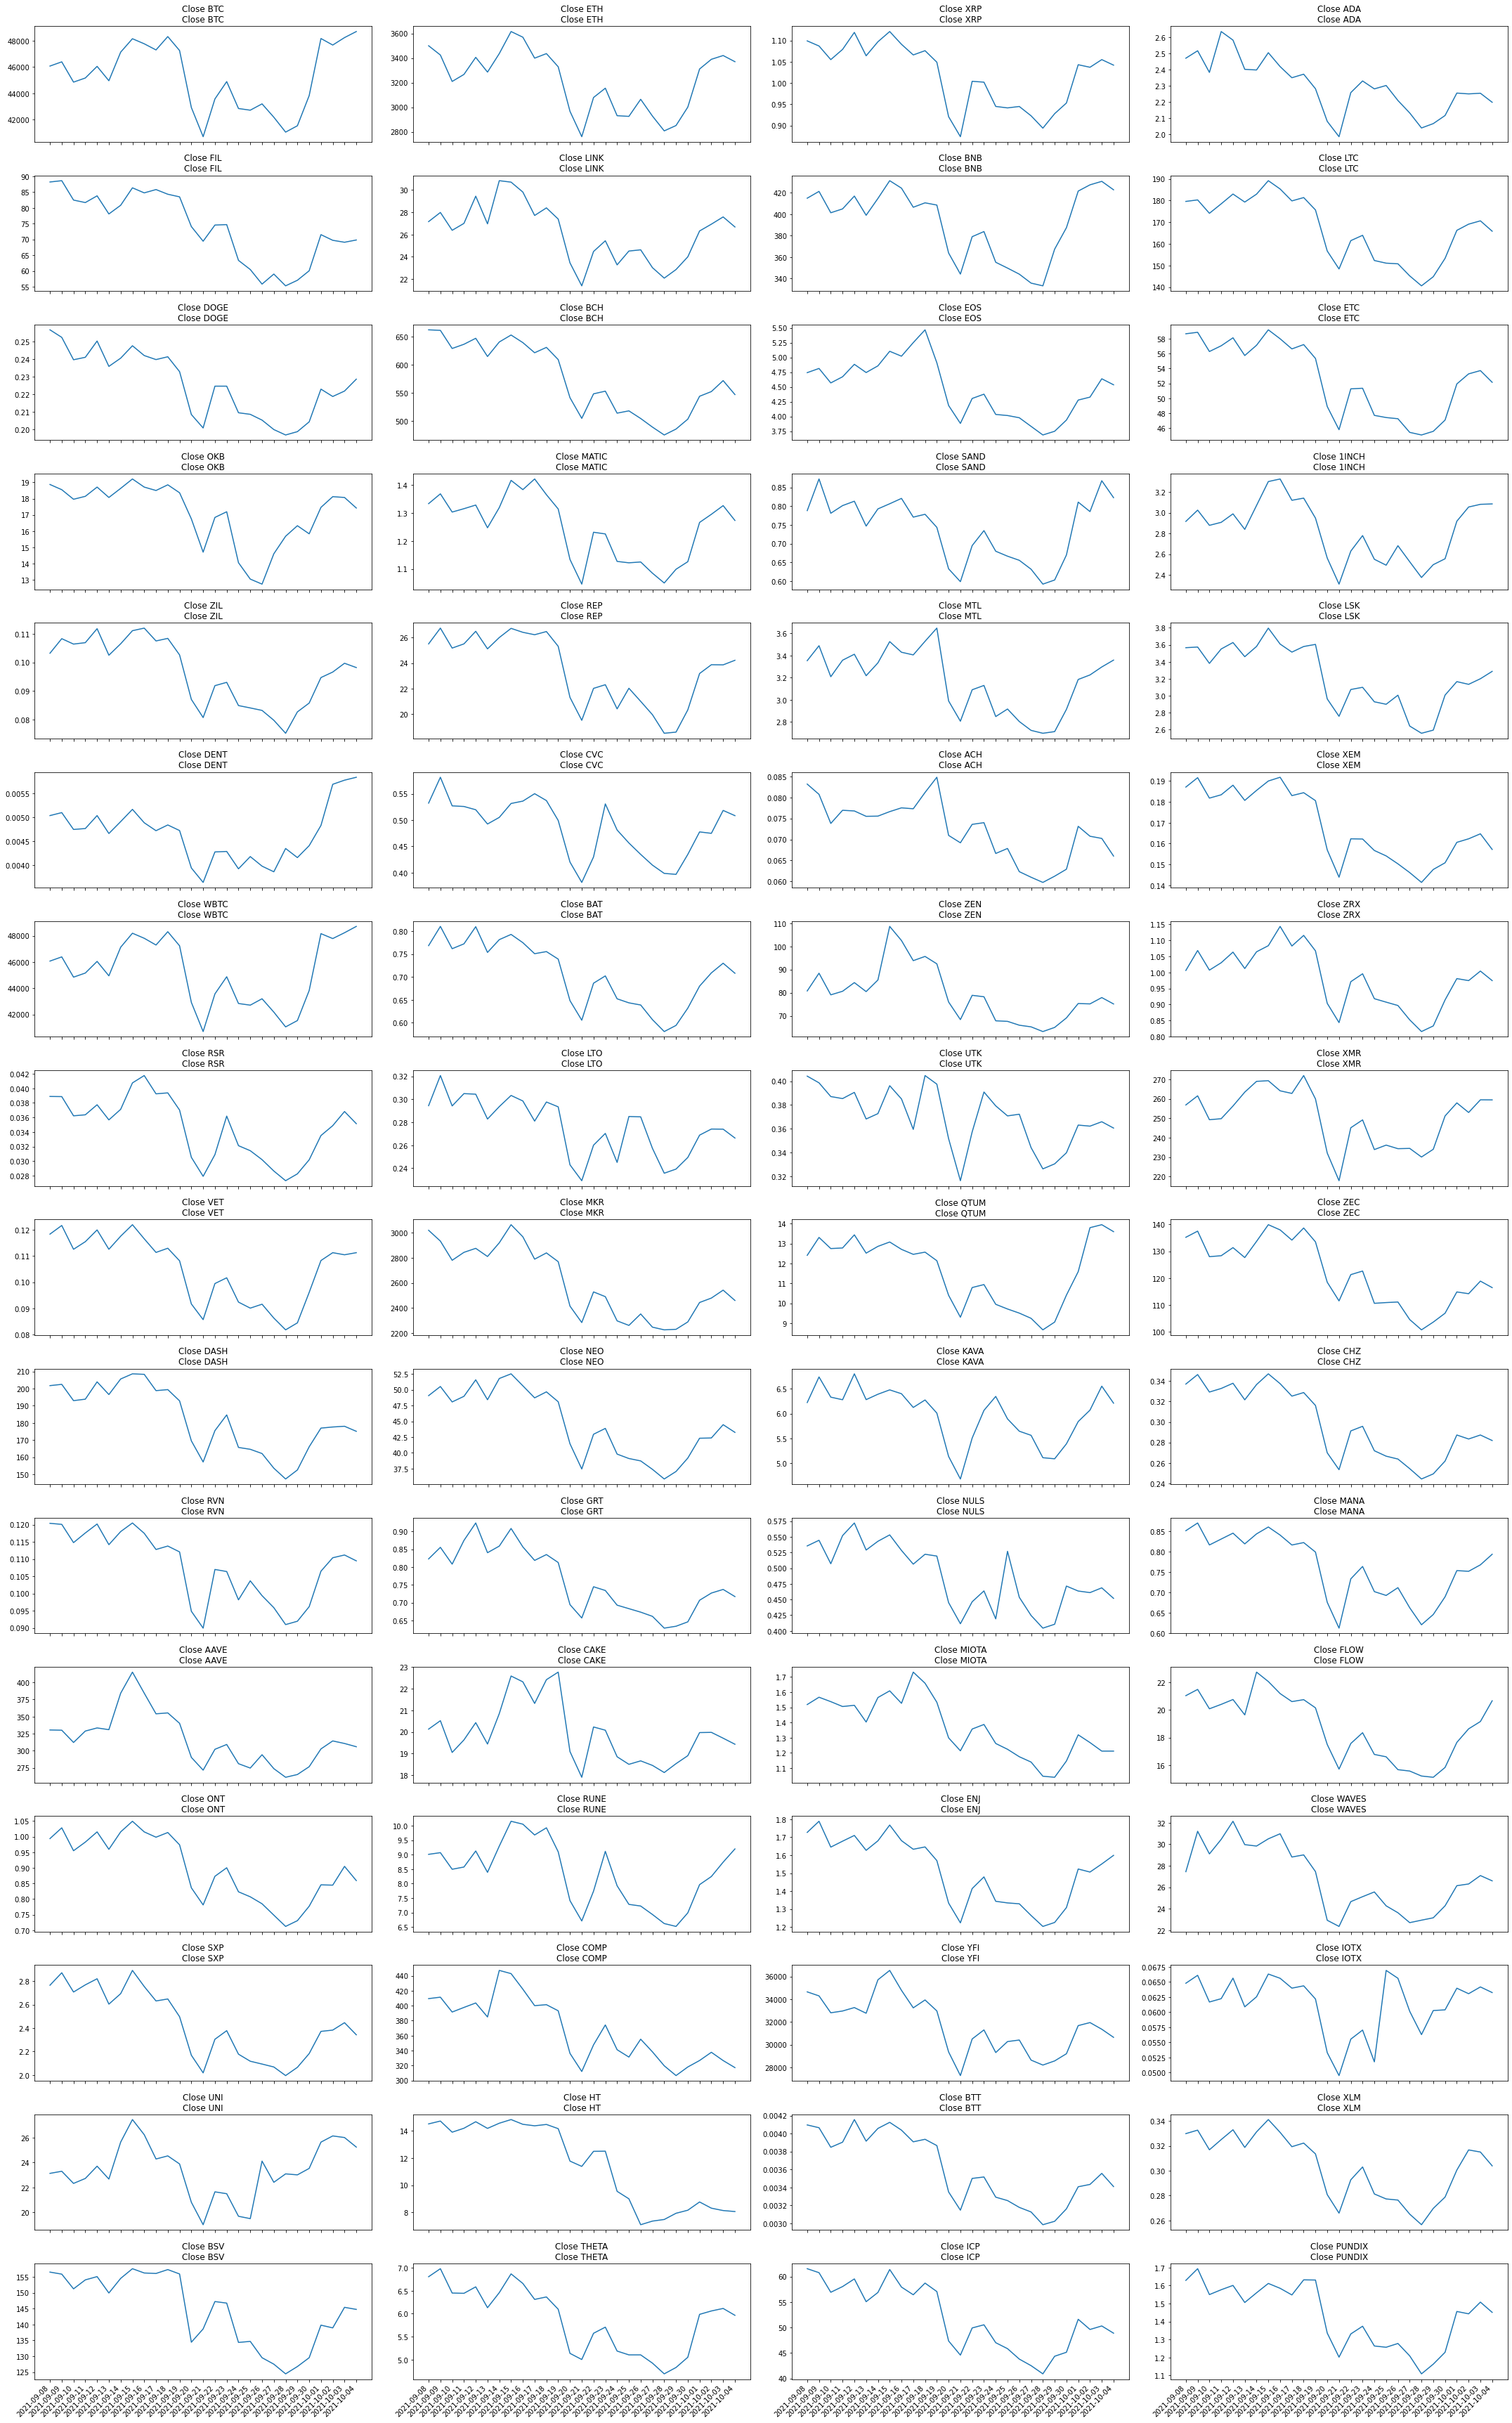

                          Cluster number: 1


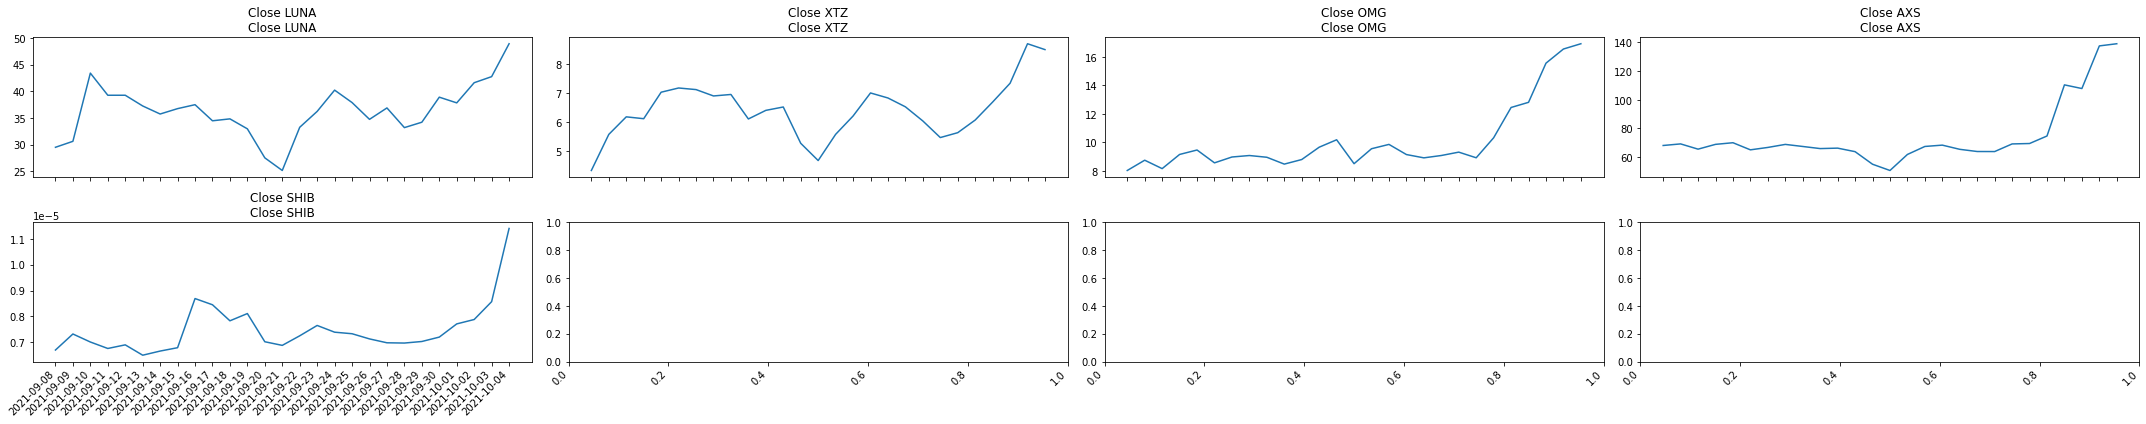

                          Cluster number: 2


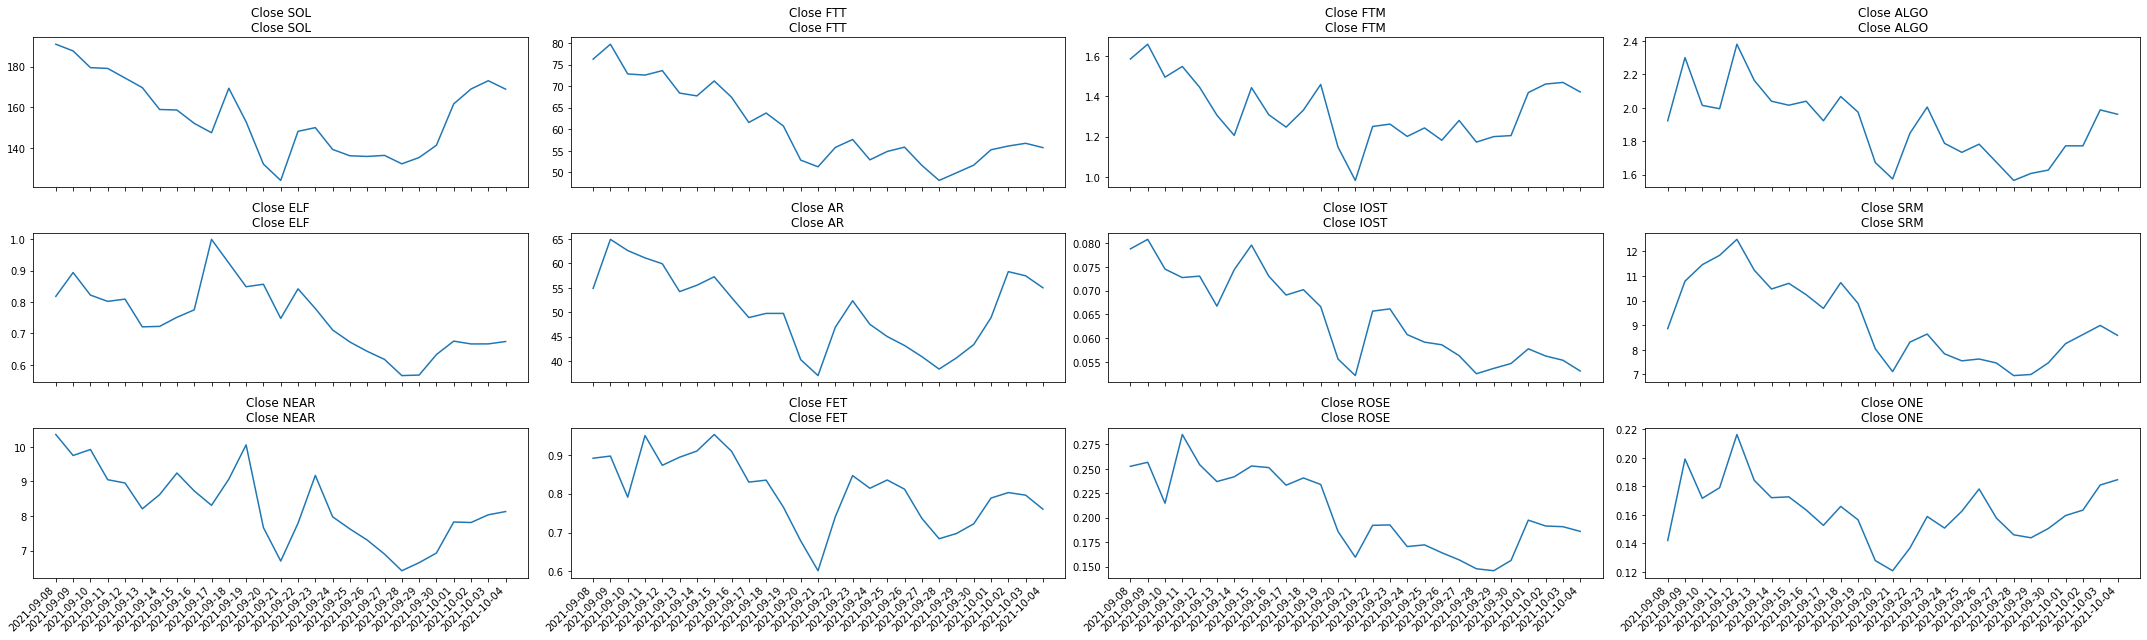

                          Cluster number: 3


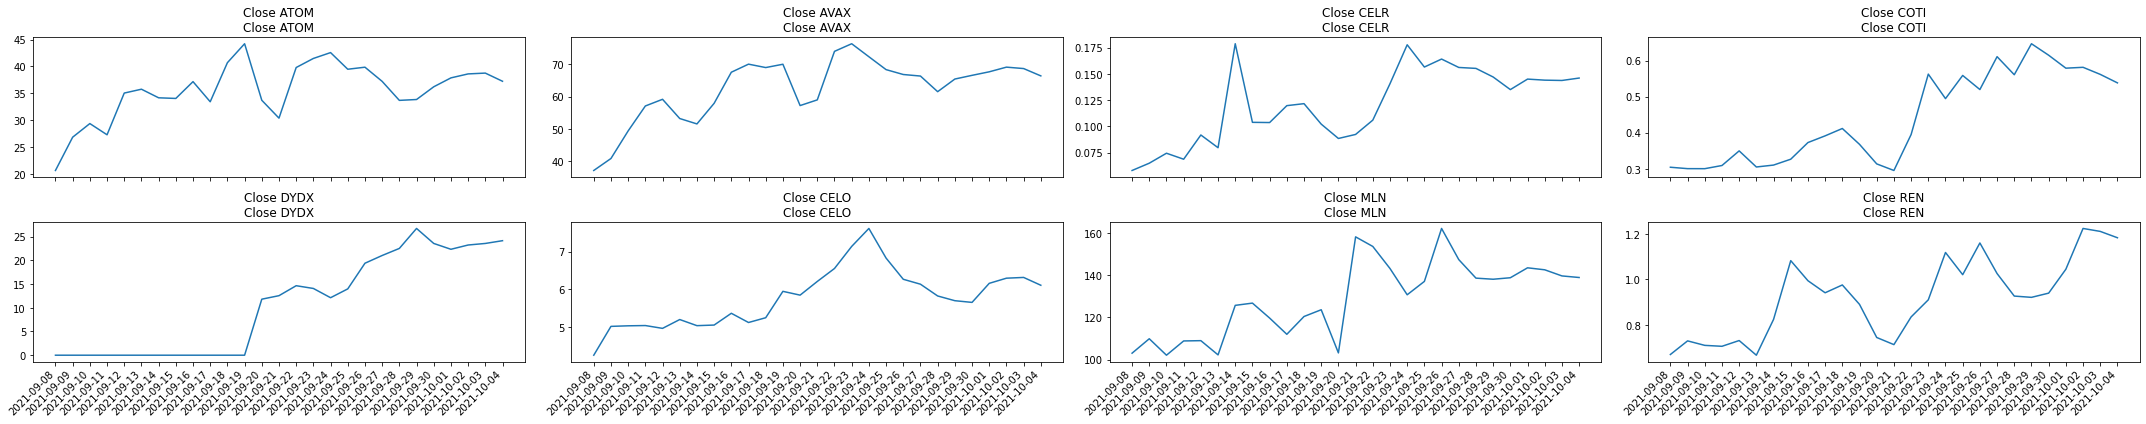

                          Cluster number: 4


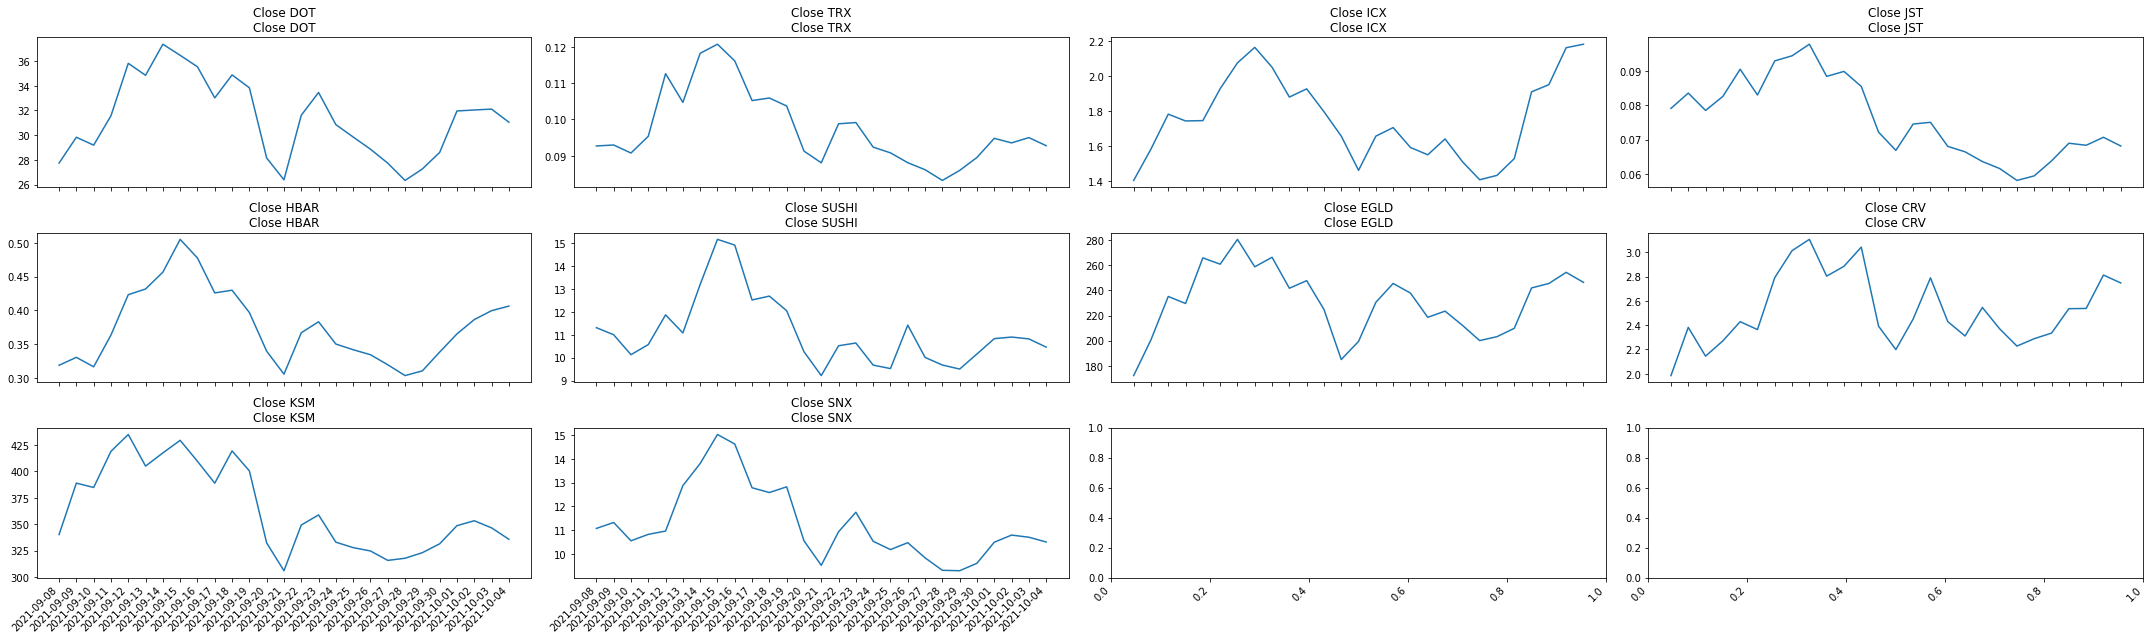

In [55]:
for cluster in range(n_clusters):
    print("=================================================================================")
    print(f"                          Cluster number: {cluster}")
    print("=================================================================================")
    plot_cluster_tickers(crypto[crypto.cluster==cluster]);